
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [3]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [4]:
# при необходимости поменяйте путь к данным
df = pd.read_csv('C:\\Users\\h180935\\OneDrive - Halliburton\\Documents\\GitHub\\howpop_train.csv')

In [5]:
df.shape

(134137, 17)

In [6]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,134137,134137,https://habrahabr.ru/post/18284/,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain,134137,2,habrahabr.ru,97048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_id,134137.0,NaN,NaN,NaN,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
published,134137,130291,2011-06-14 15:52:00,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,97657,22077,@alizar,5292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow,97048,6,develop,53318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
polling,134137,2,False,129412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content_len,134137.0,NaN,NaN,NaN,7516.929699,8724.77164,1.0,2179.0,4949.0,9858.0,352471.0
title,134137,133628,"Интересные события, произошедшие в выходные",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comments,134137.0,NaN,NaN,NaN,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0


In [8]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [10]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [11]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [12]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [86]:
df.groupby(['year', 'month']).size().sort_values(ascending=False).head(10).reset_index()

,year,month,0
0,2015,3,2189
1,2016,3,2115
2,2015,7,2111
3,2015,4,2110
4,2015,12,2084
5,2015,11,2035
6,2015,10,2030
7,2015,6,2004
8,2015,9,1944
9,2016,4,1910


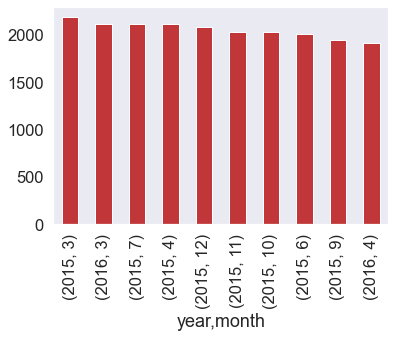

<AxesSubplot:xlabel='year,month'>

In [63]:
df.groupby(['year', 'month']).size().sort_values(ascending=False).head(10).plot(kind='bar')

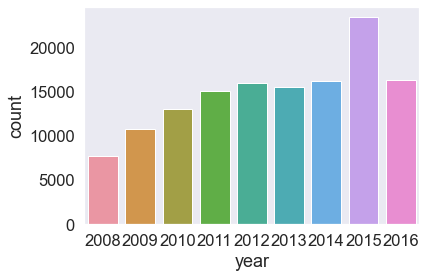

In [87]:
sns.countplot(x='year', data=df);

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

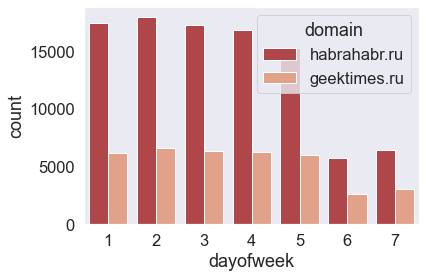

In [90]:
sns.countplot(x='dayofweek', data=df, hue='domain');

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

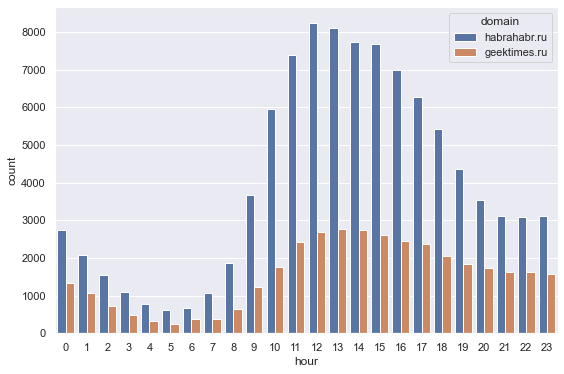

In [104]:
sns.set(rc={'figure.figsize' : (9, 6)})
sns.countplot(x='hour', data=df, hue='domain');

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

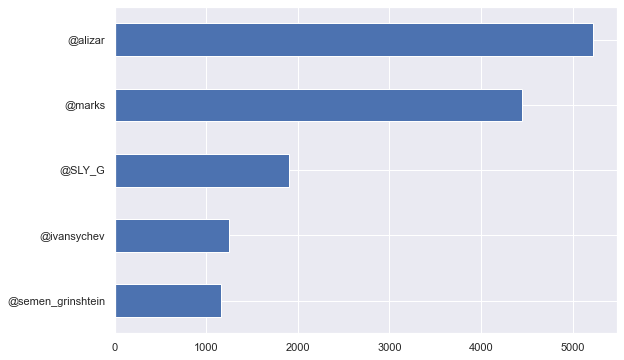

<AxesSubplot:>

In [170]:
df.query("polling == False")['author'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh')

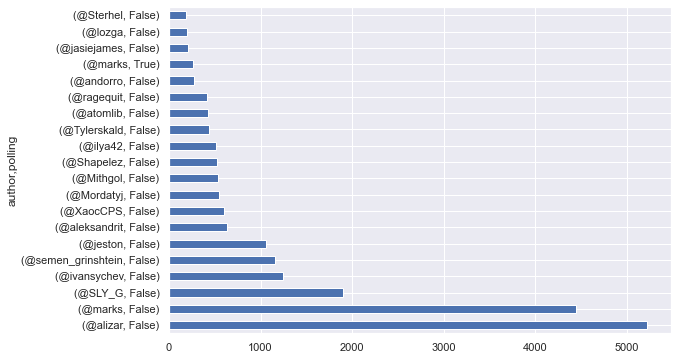

In [137]:
df[['author', 'polling']].value_counts().head(20).plot(kind='barh');

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

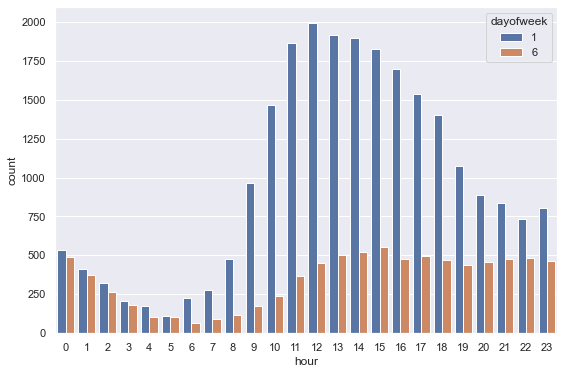

In [168]:
sns.countplot(x='hour', data=df.query("dayofweek == 1 | dayofweek == 6"), hue='dayofweek');

In [167]:
df2 = df.query("dayofweek == 1 | dayofweek == 6")
df2.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
24,https://habrahabr.ru/post/18349/,habrahabr.ru,18349,2008-01-05 13:10:00,@calg0n,admin,False,1301,Установка драйвера для видяхи NVIDIA в Ubuntu ...,18,2,656,8.0,5.0,2008,1,6,13
25,https://habrahabr.ru/post/18356/,habrahabr.ru,18356,2008-01-05 17:26:00,@agl666,misc,False,1037,Скрытие всей ветки комментариев если родительс...,6,0,158,6.0,3.0,2008,1,6,17
26,https://habrahabr.ru/post/18362/,habrahabr.ru,18362,2008-01-05 20:33:00,@kudzu,develop,False,202,М.Грубер — Понимание SQL.,36,26,17000,45.0,9.0,2008,1,6,20
27,https://habrahabr.ru/post/18363/,habrahabr.ru,18363,2008-01-05 21:43:00,@Langraf,develop,False,1175,9 монет,44,1,397,7.0,7.0,2008,1,6,21
35,https://geektimes.ru/post/18391/,geektimes.ru,18391,2008-01-07 01:16:00,@andreikharlanov,NaN,False,4195,Программа 1Password — бесплатно,31,13,21200,19.0,3.0,2008,1,1,1
